In [1]:
import pandas as pd
import numpy as np

## Here we load or Kaggle Dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\ACER\Desktop\Amazon_stock.csv')
dataset.head(5)

,Date,Open,High,Low,Close,Volume
0,03-01-2000,4.075000,4.478125,3.952344,4.468750,322352000
1,04-01-2000,4.268750,4.575000,4.087500,4.096875,349748000
2,05-01-2000,3.525000,3.756250,3.400000,3.487500,769148000
3,06-01-2000,3.565625,3.634375,3.200000,3.278125,375040000
4,07-01-2000,3.350000,3.525000,3.309375,3.478125,210108000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6050 non-null   object 
 1   Open    6050 non-null   float64
 2   High    6050 non-null   float64
 3   Low     6050 non-null   float64
 4   Close   6050 non-null   float64
 5   Volume  6050 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 283.7+ KB


In [4]:
dataset.describe()

,Open,High,Low,Close,Volume
count,6050.000000,6050.000000,6050.000000,6050.000000,6.050000e+03
mean,38.160734,38.614074,37.670999,38.152548,1.215715e+08
std,51.780179,52.388542,51.116488,51.754349,9.824691e+07
min,0.295500,0.305000,0.275500,0.298500,1.762600e+07
25%,2.269625,2.307250,2.231313,2.275125,6.547000e+07
50%,10.353250,10.634750,10.219750,10.486250,9.917500e+07
75%,64.440501,65.273502,63.576249,64.713247,1.459845e+08
max,187.199997,188.654007,184.839493,186.570496,2.086584e+09


In [5]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Outliers shown by Graphs of each column

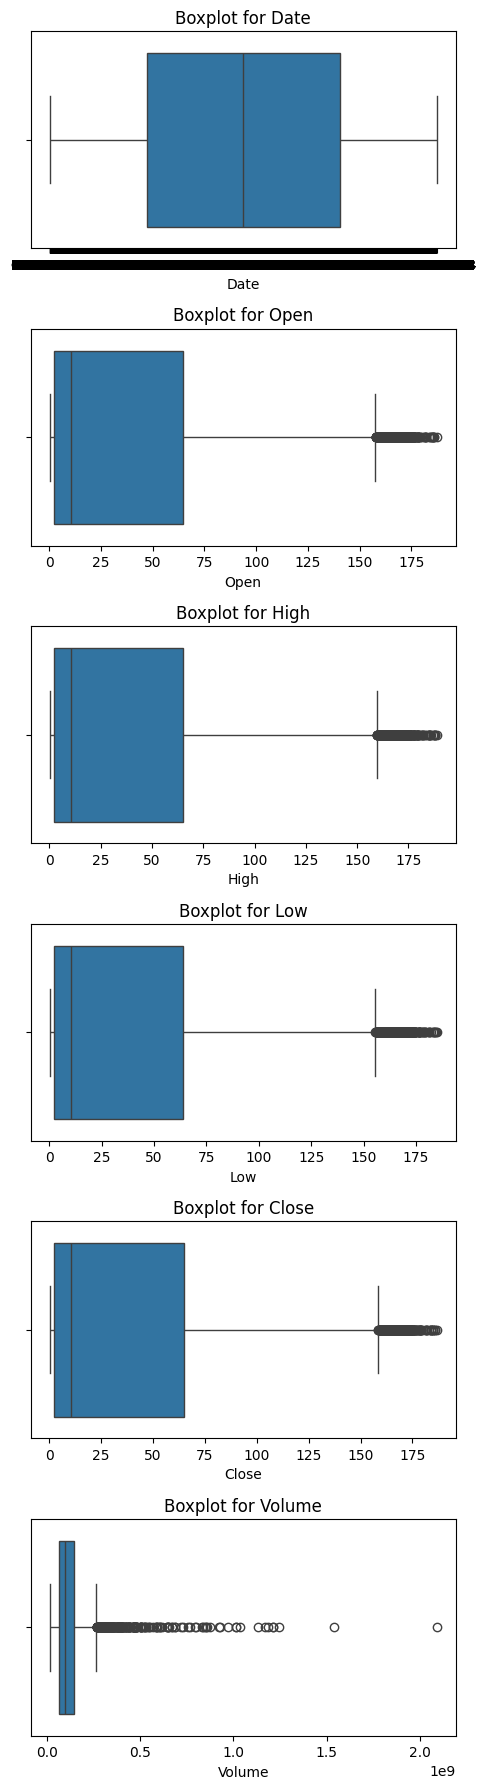

In [7]:
plt.figure(figsize=(5,len(dataset.columns)*3))
for i,column in enumerate(dataset.columns,1):
   plt.subplot(len(dataset.columns),1,i)
   sns.boxplot(x=dataset[column])
   plt.title(f"Boxplot for {column}")
plt.tight_layout()
plt.show()

## Here we remove outlier from the Volume Column by the IQR method

In [8]:
q1=dataset["Volume"].quantile(0.25)
q3=dataset["Volume"].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
dataset=dataset[dataset["Volume"]<=max_range]

In [9]:
dataset

,Date,Open,High,Low,Close,Volume
4,07-01-2000,3.350000,3.525000,3.309375,3.478125,210108000
6,11-01-2000,3.343750,3.500000,3.250000,3.337500,210654000
7,12-01-2000,3.393750,3.400000,3.150000,3.178125,216090000
8,13-01-2000,3.246875,3.359375,3.156250,3.296875,208962000
9,14-01-2000,3.337500,3.431250,3.200000,3.212500,137072000
...,...,...,...,...,...,...
6045,12-01-2024,155.389999,156.199997,154.009995,154.619995,40460300
6046,16-01-2024,153.529999,154.990005,152.149994,153.160004,41384600
6047,17-01-2024,151.490005,152.149994,149.910004,151.710007,34953400
6048,18-01-2024,152.770004,153.779999,151.820007,153.500000,37850200


## Here we split the Date column into the Separate Columns(Day, Month, Year) Because Date columns is treated as a Object Column

In [10]:
splitted = dataset['Date'].str.split('-', expand=True)

dataset['Day'] = splitted[0].astype('int')
dataset['Month'] = splitted[1].astype('int')
dataset['Year'] = splitted[2].astype('int')

dataset.head()


,Date,Open,High,Low,Close,Volume,Day,Month,Year
4,07-01-2000,3.350000,3.525000,3.309375,3.478125,210108000,7,1,2000
6,11-01-2000,3.343750,3.500000,3.250000,3.337500,210654000,11,1,2000
7,12-01-2000,3.393750,3.400000,3.150000,3.178125,216090000,12,1,2000
8,13-01-2000,3.246875,3.359375,3.156250,3.296875,208962000,13,1,2000
9,14-01-2000,3.337500,3.431250,3.200000,3.212500,137072000,14,1,2000


In [11]:
dataset.drop("Date",inplace=True,axis=1)

In [12]:
dataset["Close"]=dataset.pop("Close")
dataset

,Open,High,Low,Volume,Day,Month,Year,Close
4,3.350000,3.525000,3.309375,210108000,7,1,2000,3.478125
6,3.343750,3.500000,3.250000,210654000,11,1,2000,3.337500
7,3.393750,3.400000,3.150000,216090000,12,1,2000,3.178125
8,3.246875,3.359375,3.156250,208962000,13,1,2000,3.296875
9,3.337500,3.431250,3.200000,137072000,14,1,2000,3.212500
...,...,...,...,...,...,...,...,...
6045,155.389999,156.199997,154.009995,40460300,12,1,2024,154.619995
6046,153.529999,154.990005,152.149994,41384600,16,1,2024,153.160004
6047,151.490005,152.149994,149.910004,34953400,17,1,2024,151.710007
6048,152.770004,153.779999,151.820007,37850200,18,1,2024,153.500000


## Here we Standardised the dataset by StandardScaler()

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features=dataset.drop("Close",axis=1)
#target=dataset[["Close"]]
features_scaled=ss.fit_transform(features)
#target_scaled=ss.fit_transform(target)
dataset.loc[:, features.columns] = features_scaled
dataset.to_csv('Amazon_Stock_Prediction.csv', index=True)
dataset

C:\Users\ACER\AppData\Local\Temp\ipykernel_15592\1250113254.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.9875837   1.99805932  2.10235504 ... -1.3729526  -1.31737427
 -1.06443412]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[:, features.columns] = features_scaled
C:\Users\ACER\AppData\Local\Temp\ipykernel_15592\1250113254.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.9891392  -0.53001467 -0.41523353 ...  0.15867213  0.27345327
  0.3882344 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[:, features.columns] = features_scaled
C:\Users\ACER\AppData\Local\Temp\ipykernel_15592\1250113254.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6268

,Open,High,Low,Volume,Day,Month,Year,Close
4,-0.693970,-0.691393,-0.694015,1.987584,-0.989139,-1.62686,-1.708217,3.478125
6,-0.694089,-0.691864,-0.695162,1.998059,-0.530015,-1.62686,-1.708217,3.337500
7,-0.693136,-0.693750,-0.697094,2.102355,-0.415234,-1.62686,-1.708217,3.178125
8,-0.695938,-0.694516,-0.696974,1.965596,-0.300452,-1.62686,-1.708217,3.296875
9,-0.694209,-0.693161,-0.696128,0.586307,-0.185671,-1.62686,-1.708217,3.212500
...,...,...,...,...,...,...,...,...
6045,2.206655,2.187372,2.218224,-1.267297,-0.415234,-1.62686,1.763481,154.619995
6046,2.171170,2.164557,2.182280,-1.249563,0.043891,-1.62686,1.763481,153.160004
6047,2.132251,2.111007,2.138993,-1.372953,0.158672,-1.62686,1.763481,151.710007
6048,2.156670,2.141742,2.175903,-1.317374,0.273453,-1.62686,1.763481,153.500000


## Here we split the dataset into the train and test dataset by using the train_test_split

In [14]:
from sklearn.model_selection import train_test_split
x=dataset.drop("Close",axis=1)
y=dataset["Close"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
dataset.corr()

,Open,High,Low,Volume,Day,Month,Year,Close
Open,1.000000,0.999910,0.999895,-0.395676,0.005368,0.034558,0.828340,0.999782
High,0.999910,1.000000,0.999872,-0.393694,0.005258,0.033991,0.828387,0.999898
Low,0.999895,0.999872,1.000000,-0.398049,0.005551,0.034616,0.828448,0.999902
Volume,-0.395676,-0.393694,-0.398049,1.000000,0.003298,-0.046028,-0.536859,-0.395907
Day,0.005368,0.005258,0.005551,0.003298,1.000000,-0.002686,0.002313,0.005360
Month,0.034558,0.033991,0.034616,-0.046028,-0.002686,1.000000,-0.009750,0.034134
Year,0.828340,0.828387,0.828448,-0.536859,0.002313,-0.009750,1.000000,0.828559
Close,0.999782,0.999898,0.999902,-0.395907,0.005360,0.034134,0.828559,1.000000


In [16]:
#from sklearn import set_config
#set_config(display="text")


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Here we made our model with 1 Input layer, 3 Hidden layers, and 1 output layer. Activation fun is relu() in Hidden layers and linear() in Output layers. Optimizer is adam and we run our model on 50 epochs

In [18]:
model=Sequential()

In [19]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 7)             │           56 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 5)             │           40 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 4)             │           24 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 2)             │           10 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 1)             │            3 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

## Here we train our model

In [20]:
model.compile(loss='MeanSquaredError',optimizer='Adam')
model.fit(x_train,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4114.4009 - val_loss: 4423.8149
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4125.8555 - val_loss: 4063.5559
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3509.4468 - val_loss: 2154.7744
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1291.6422 - val_loss: 78.2866
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 56.7783 - val_loss: 36.0935
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 30.0366 - val_loss: 25.5531
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 23.4464 - val_loss: 20.4095
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.9816 - val_loss: 17.2717
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.9703 - val_loss: 14.8262
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12.8859 - val_loss: 13.1084
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.8093 - val_loss: 11.7322
Epoch 12/50
101

In [21]:
y_pred=model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


## Here we evaluate our model by using the r2_score and MSE

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1.4725244793390202
0.9994595779770055


## Here we save our model for the future use and anybody can use it

In [23]:
import joblib
joblib.dump(model,"Deep_learning_Stock_Prediction1")

['Deep_learning_Stock_Prediction1']

In [24]:
joblib.dump(ss,"StandardScaler1")

['StandardScaler1']